## foundations of Data Science (Case Study)

K Chaitanya Sai [AV.EN.U4CSE22121]

## Data Collection and Preprocessing:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
data=pd.read_csv("food_orders_new_delhi (1).csv")
data

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


In [3]:
data.head(5)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
print(data.tail(5))
print(data.info())
data.describe()

     Order ID Customer ID Restaurant ID  Order Date and Time  \
995       996       C6232         R2129  2024-01-14 05:57:00   
996       997       C6797         R2742  2024-01-28 08:50:43   
997       998       C5926         R2837  2024-01-21 09:43:19   
998       999       C7016         R2144  2024-01-30 22:23:38   
999      1000       C4335         R2890  2024-01-08 14:46:43   

    Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
995    2024-01-14 06:39:00          825             0    Digital Wallet   
996    2024-01-28 10:10:43         1627            50  Cash on Delivery   
997    2024-01-21 10:44:19          553            20  Cash on Delivery   
998    2024-01-31 00:07:38         1414             0  Cash on Delivery   
999    2024-01-08 15:39:43         1657            20    Digital Wallet   

    Discounts and Offers  Commission Fee  Payment Processing Fee  \
995            5% on App             165                      47   
996                  NaN    

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


## Handling Missing Values

In [5]:

# Data Cleaning
# Handle missing values in Discounts and Offers
data['Discounts and Offers'] = data['Discounts and Offers'].fillna('No Discount')

# Convert dates to datetime
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])

# Calculate Delivery Duration in minutes
data['Delivery Duration'] = (data['Delivery Date and Time'] - data['Order Date and Time']).dt.total_seconds() / 60

# Preview cleaned data
print(data.head())

   Order ID Customer ID Restaurant ID Order Date and Time  \
0         1       C8270         R2924 2024-02-01 01:11:52   
1         2       C1860         R2054 2024-02-02 22:11:04   
2         3       C6390         R2870 2024-01-31 05:54:35   
3         4       C6191         R2642 2024-01-16 22:52:49   
4         5       C6734         R2799 2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                      23

### Data Transformation

In [6]:

data['Discounts and Offers'] = data['Discounts and Offers'].str.extract('(\d+)').astype(float).fillna(0)

# Replace "No" with 0 and convert column to numeric
data['Discounts and Offers'] = data['Discounts and Offers'].replace("No", 0).astype(float)

print("Discounts and offers after calculation:")
print(data["Discounts and Offers"].head(5))

# Calculate the total cost of the order including discounts, offers, tax
data['Total Cost']=data['Delivery Fee'] + data['Discounts and Offers']+data['Payment Processing Fee']


print("Total cost of the order including discounts, offers, tax:")
print(data['Total Cost'].head(5))

# Calculate profit for each order
data["Profit"] = data["Commission Fee"] - data["Total Cost"]

print("Profit of the order:")
print(data['Profit'].head(5))


Discounts and offers after calculation:
0     5.0
1    10.0
2    15.0
3     0.0
4    50.0
Name: Discounts and Offers, dtype: float64
Total cost of the order including discounts, offers, tax:
0     52.0
1     73.0
2     90.0
3     77.0
4    130.0
Name: Total Cost, dtype: float64
Profit of the order:
0     98.0
1    125.0
2    105.0
3     69.0
4      0.0
Name: Profit, dtype: float64


In [7]:
drop_columns=['Order ID','Restaurant ID','Customer ID','Order Date and Time','Delivery Date and Time']
data=data.drop(columns=drop_columns)

In [8]:
data

,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery Duration,Total Cost,Profit
0,1914,0,Credit Card,5.0,150,47,0,88.0,52.0,98.0
1,986,40,Digital Wallet,10.0,198,23,0,35.0,73.0,125.0
2,937,30,Cash on Delivery,15.0,195,45,0,58.0,90.0,105.0
3,1463,50,Cash on Delivery,0.0,146,27,0,46.0,77.0,69.0
4,1992,30,Cash on Delivery,50.0,130,50,0,89.0,130.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,825,0,Digital Wallet,5.0,165,47,50,42.0,52.0,113.0
996,1627,50,Cash on Delivery,0.0,110,42,0,80.0,92.0,18.0
997,553,20,Cash on Delivery,0.0,64,31,0,61.0,51.0,13.0
998,1414,0,Cash on Delivery,15.0,199,34,0,104.0,49.0,150.0


In [9]:
print(data['Payment Method'].value_counts())


Payment Method
Cash on Delivery    357
Credit Card         337
Digital Wallet      306
Name: count, dtype: int64


In [26]:
data.to_csv("food_delivery.csv",index=False)

In [10]:
import pandas as pd

# Perform one-hot encoding for Payment Method
data_encoded = pd.get_dummies(data, columns=['Payment Method'], prefix='Payment_Method')

# Display the updated DataFrame
data_encoded


,Order Value,Delivery Fee,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery Duration,Total Cost,Profit,Payment_Method_Cash on Delivery,Payment_Method_Credit Card,Payment_Method_Digital Wallet
0,1914,0,5.0,150,47,0,88.0,52.0,98.0,False,True,False
1,986,40,10.0,198,23,0,35.0,73.0,125.0,False,False,True
2,937,30,15.0,195,45,0,58.0,90.0,105.0,True,False,False
3,1463,50,0.0,146,27,0,46.0,77.0,69.0,True,False,False
4,1992,30,50.0,130,50,0,89.0,130.0,0.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,825,0,5.0,165,47,50,42.0,52.0,113.0,False,False,True
996,1627,50,0.0,110,42,0,80.0,92.0,18.0,True,False,False
997,553,20,0.0,64,31,0,61.0,51.0,13.0,True,False,False
998,1414,0,15.0,199,34,0,104.0,49.0,150.0,True,False,False


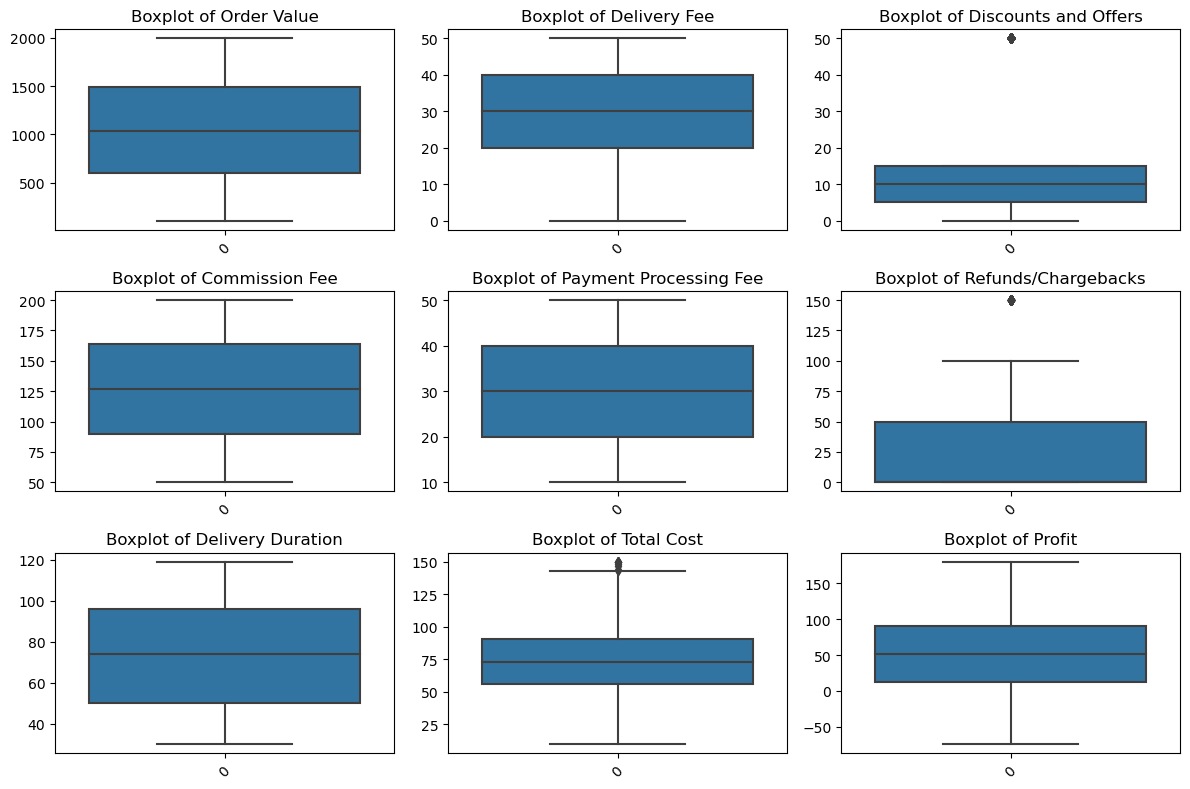

,count,mean,std,min,25%,50%,75%,max,IQR
Order Value,1000.0,1053.969,530.975339,104.0,597.75,1038.5,1494.0,1995.0,896.25
Delivery Fee,1000.0,28.620,16.958278,0.0,20.00,30.0,40.0,50.0,20.00
Discounts and Offers,1000.0,16.265,17.626272,0.0,5.00,10.0,15.0,50.0,10.00
Commission Fee,1000.0,126.990,43.064050,50.0,90.00,127.0,164.0,200.0,74.00
Payment Processing Fee,1000.0,29.832,11.627165,10.0,20.00,30.0,40.0,50.0,20.00
Refunds/Chargebacks,1000.0,28.300,49.614228,0.0,0.00,0.0,50.0,150.0,50.00
Delivery Duration,1000.0,73.575,26.015133,30.0,50.00,74.0,96.0,119.0,46.00
Total Cost,1000.0,74.717,26.902093,10.0,56.00,73.0,91.0,150.0,35.00
Profit,1000.0,52.273,50.235925,-74.0,13.00,51.5,91.0,180.0,78.00


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = data.select_dtypes(include=["number"]).columns

plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i) 
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()


# Calculating descriptive statistics
stats = data.describe().T
stats["IQR"] = stats["75%"] - stats["25%"]  # Interquartile Range
stats


### Data Visualization

Discounts and Offers      16265.0
Delivery Fee              28620.0
Payment Processing Fee    29832.0
dtype: float64


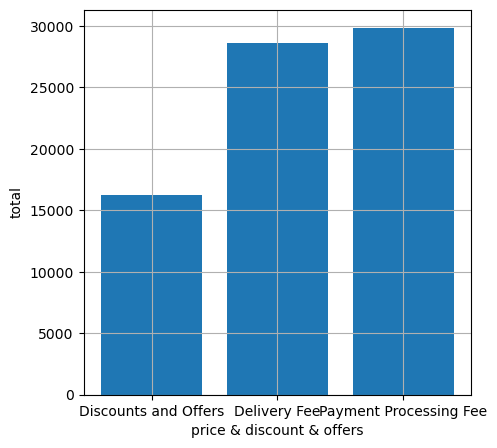

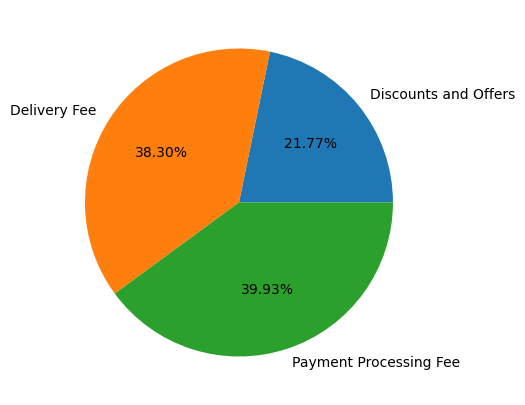

In [12]:
cost_dist=data[['Discounts and Offers','Delivery Fee', 'Payment Processing Fee']].sum()
print(cost_dist)

plt.figure(figsize=(5,5))
plt.bar(cost_dist.index,cost_dist.values)
plt.xlabel("price & discount & offers")
plt.ylabel("total")
plt.grid(True)
plt.show()

plt.figure(figsize=(5,5))
plt.pie(cost_dist,labels=cost_dist.index,autopct="%1.2f%%")
plt.show()


Commission Fee    126990.0
Total Cost         74717.0
Profit             52273.0
dtype: float64


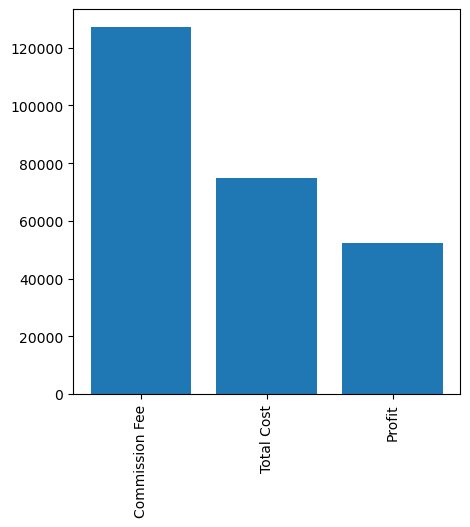

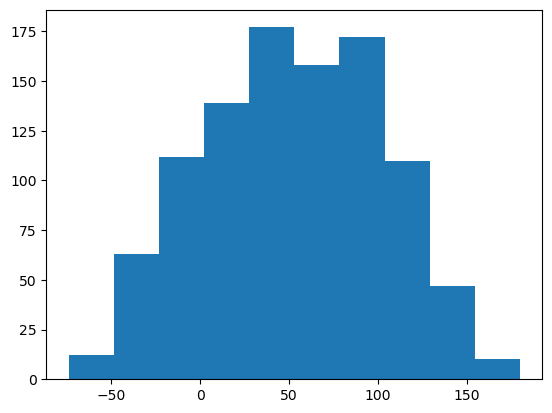

In [13]:

profits=data[['Commission Fee','Total Cost','Profit']].sum()
print(profits)

plt.figure(figsize=(5,5))
plt.bar(profits.index,profits)
plt.xticks(rotation=90)
plt.show()

plt.hist(data['Profit'])
plt.show()

## Descriptive Analysis:

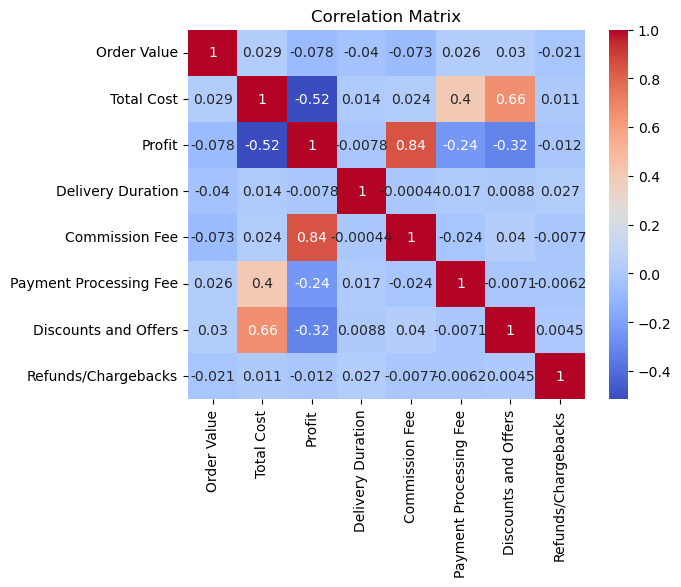

 descriptive statistics all the columns 


,Order Value,Total Cost,Profit,Delivery Duration,Commission Fee,Payment Processing Fee,Discounts and Offers,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,1053.969000,74.717000,52.273000,73.575000,126.99000,29.832000,16.265000,28.300000
std,530.975339,26.902093,50.235925,26.015133,43.06405,11.627165,17.626272,49.614228
min,104.000000,10.000000,-74.000000,30.000000,50.00000,10.000000,0.000000,0.000000
25%,597.750000,56.000000,13.000000,50.000000,90.00000,20.000000,5.000000,0.000000
50%,1038.500000,73.000000,51.500000,74.000000,127.00000,30.000000,10.000000,0.000000
75%,1494.000000,91.000000,91.000000,96.000000,164.00000,40.000000,15.000000,50.000000
max,1995.000000,150.000000,180.000000,119.000000,200.00000,50.000000,50.000000,150.000000


In [14]:

# Descriptive statistics
desc_stats = data[['Order Value', 'Total Cost','Profit', 'Delivery Duration','Commission Fee','Payment Processing Fee','Discounts and Offers','Refunds/Chargebacks']].describe()


# Correlation matrix
correlation_matrix = data[['Order Value', 'Total Cost','Profit', 'Delivery Duration','Commission Fee','Payment Processing Fee','Discounts and Offers','Refunds/Chargebacks']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(" descriptive statistics all the columns ")
desc_stats

## Inferential Analysis :

Correlation: -0.32309395404089714
P-value: 9.924477246501938e-26
Reject the null hypothesis: There is a significant relationship between Delivery Fee and Profit.


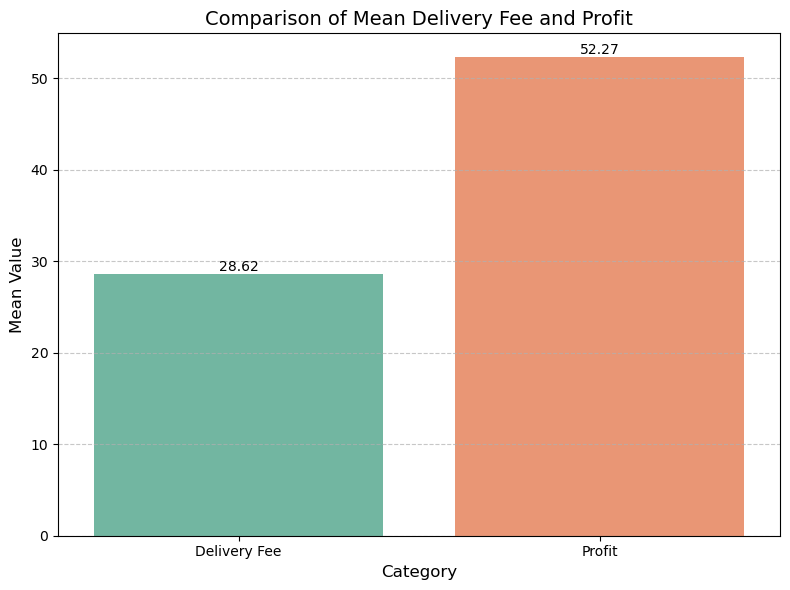

In [15]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a DataFrame with columns 'Delivery Fee' and 'Profit'
# Pearson correlation
corr, p_value = stats.pearsonr(data['Delivery Fee'], data['Profit'])

# Output the results
print(f"Correlation: {corr}")
print(f"P-value: {p_value}")

# Hypothesis decision
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Delivery Fee and Profit.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Delivery Fee and Profit.")

# Calculate the means
mean_delivery_fee = data['Delivery Fee'].mean()
mean_profit = data['Profit'].mean()

# Prepare data for bar plot
categories = ['Delivery Fee', 'Profit']
means = [mean_delivery_fee, mean_profit]

# Plot the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=means, palette='Set2')
plt.title('Comparison of Mean Delivery Fee and Profit', fontsize=14)
plt.ylabel('Mean Value', fontsize=12)
plt.xlabel('Category', fontsize=12)

# Annotate the bars with mean values
for i, value in enumerate(means):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Show gridlines and plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


T-statistic: -0.6365540828352296
P-value: 0.5246258404539426
Mean Profit (Cash on Delivery): 49.22
Mean Profit (Credit Card): 51.58
Fail to reject the null hypothesis: There is no significant difference in mean profits between the two payment methods.


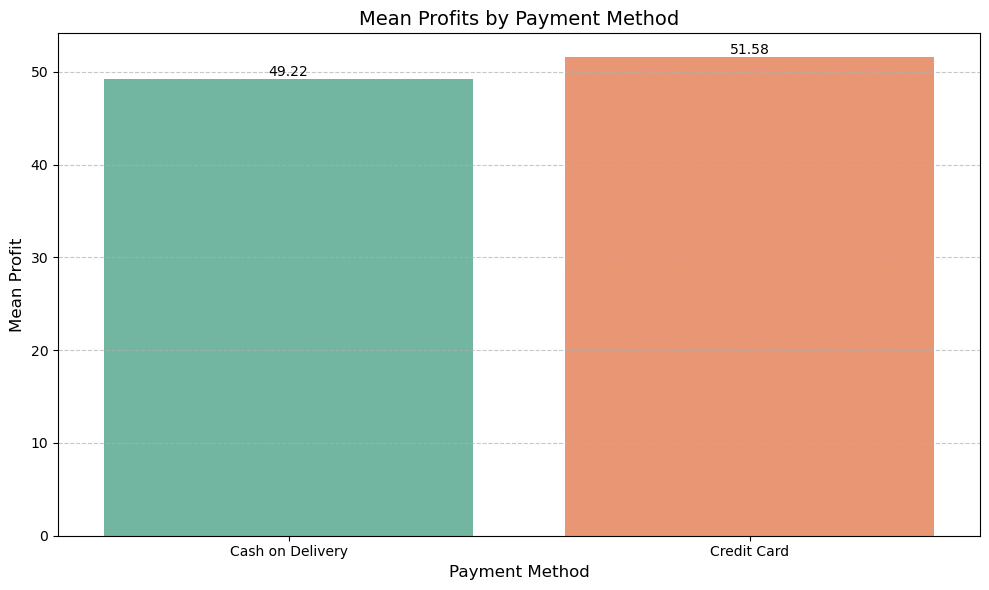

In [16]:

# Separate the data into groups based on payment method
group_a = data_encoded[data_encoded['Payment_Method_Cash on Delivery'] == 1]['Profit']
group_b = data_encoded[data_encoded['Payment_Method_Credit Card'] == 1]['Profit']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)

# Calculate mean profits for each group
mean_group_a = group_a.mean()
mean_group_b = group_b.mean()

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Mean Profit (Cash on Delivery): {mean_group_a:.2f}")
print(f"Mean Profit (Credit Card): {mean_group_b:.2f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean profits between the two payment methods.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean profits between the two payment methods.")

# Prepare data for the bar plot
methods = ['Cash on Delivery', 'Credit Card']
means = [mean_group_a, mean_group_b]

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=methods, y=means, palette='Set2')
plt.title('Mean Profits by Payment Method', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Mean Profit', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with mean values
for i, mean in enumerate(means):
    plt.text(i, mean + 0.01, f'{mean:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


95% Confidence Interval for Mean Profit: (49.3018, 55.6814)


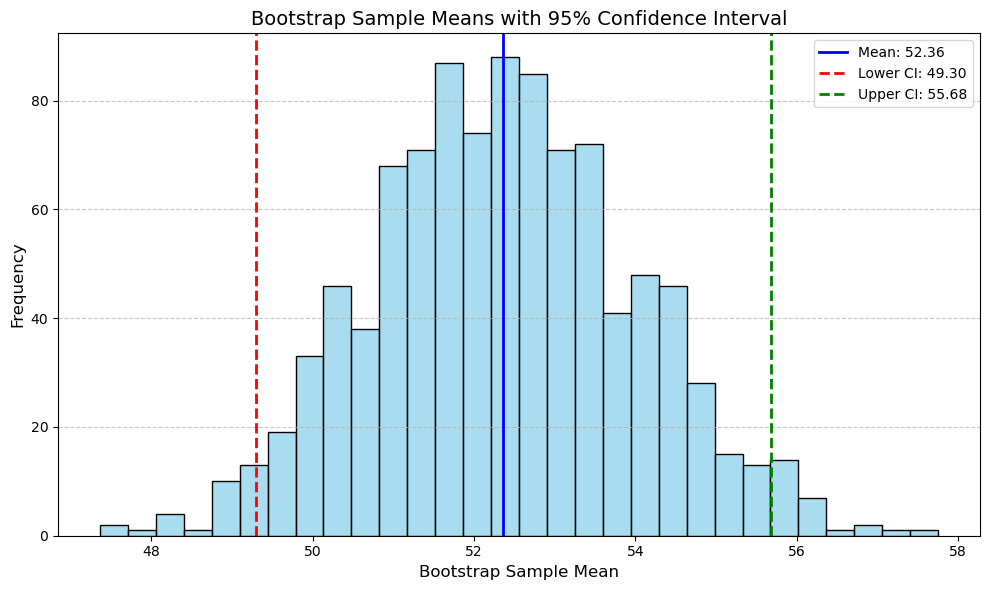

In [17]:

# Bootstrapping function to calculate mean profit
def bootstrap_mean(data, n_iterations=1000):
    means = []
    for _ in range(n_iterations):
        resample = np.random.choice(data, size=len(data), replace=True)  # Resampling with replacement
        means.append(np.mean(resample))
    return means

# Bootstrapping the profit column (replace 'data["Profit"]' with your actual data)
bootstrapped_means = bootstrap_mean(data['Profit'])

# Calculate the 95% confidence interval for the mean
lower = np.percentile(bootstrapped_means, 2.5)
upper = np.percentile(bootstrapped_means, 97.5)
mean = np.mean(bootstrapped_means)

print(f"95% Confidence Interval for Mean Profit: ({lower}, {upper})")

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(bootstrapped_means, kde=False, bins=30, color='skyblue', alpha=0.7)

# Add vertical lines for mean and confidence intervals
plt.axvline(mean, color='blue', linestyle='-', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(lower, color='red', linestyle='--', linewidth=2, label=f'Lower CI: {lower:.2f}')
plt.axvline(upper, color='green', linestyle='--', linewidth=2, label=f'Upper CI: {upper:.2f}')

# Add title, labels, and legend
plt.title('Bootstrap Sample Means with 95% Confidence Interval', fontsize=14)
plt.xlabel('Bootstrap Sample Mean', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


##                                                  Model Assessment

In [18]:

# Convert 'Profit' into a binary target variable (1 = High Profit, 0 = Low Profit)
data['High_Profit'] = np.where(data['Profit'] > 0, 1, 0)

In [19]:
data['High_Profit'].value_counts()

High_Profit
1    827
0    173
Name: count, dtype: int64

### Regression Model (Logistic Regression)

Logistic Regression Performance Metrics:
Accuracy: 0.9900
Precision: 0.9877
Recall: 1.0000
F1 Score: 0.9938
Mean Absolute Error (MAE): 0.0720
Mean Squared Error (MSE): 0.0210
Root Mean Squared Error (RMSE): 0.1449
R-squared: 0.8688

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.99      1.00      0.99       160

    accuracy                           0.99       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200


Confusion Matrix:
[[ 38   2]
 [  0 160]]


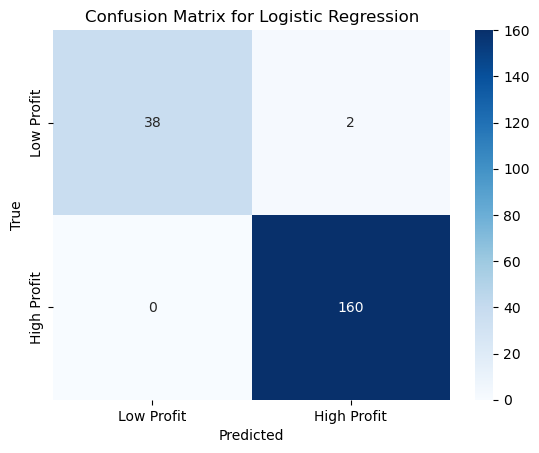

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = data[['Order Value', 'Delivery Fee', 'Discounts and Offers', 'Commission Fee', 
          'Payment Processing Fee', 'Refunds/Chargebacks', 
          'Total Cost','Delivery Duration']]
y = data['High_Profit']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, solver='liblinear')

# Train the model
logreg_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = logreg_model.predict(X_test_scaled)
y_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate MAE, MSE, RMSE (using predicted probabilities)
mae = mean_absolute_error(y_test, y_prob)
mse = mean_squared_error(y_test, y_prob)
rmse = mean_squared_error(y_test, y_prob, squared=False)

# Calculate R-squared (using predicted probabilities)
r2 = r2_score(y_test, y_prob)

# Print metrics
print("Logistic Regression Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Profit', 'High Profit'], yticklabels=['Low Profit', 'High Profit'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Classification model ( KNN,Random Forest)  

KNN Performance Metrics:
Accuracy: 0.8700
Precision: 0.8895
Recall: 0.9563
F1 Score: 0.9217

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.53      0.62        40
           1       0.89      0.96      0.92       160

    accuracy                           0.87       200
   macro avg       0.82      0.74      0.77       200
weighted avg       0.86      0.87      0.86       200


Confusion Matrix:
[[ 21  19]
 [  7 153]]


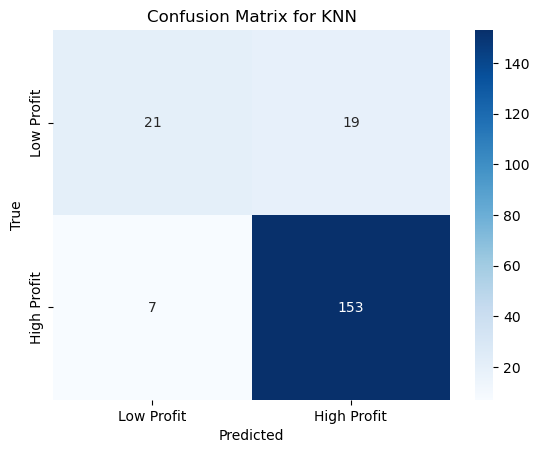

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample

# Initialize KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("KNN Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Profit', 'High Profit'], yticklabels=['Low Profit', 'High Profit'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Random Forest Performance Metrics:
Accuracy: 0.9450
Precision: 0.9461
Recall: 0.9875
F1 Score: 0.9664

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        40
           1       0.95      0.99      0.97       160

    accuracy                           0.94       200
   macro avg       0.94      0.88      0.91       200
weighted avg       0.94      0.94      0.94       200


Confusion Matrix:
[[ 31   9]
 [  2 158]]


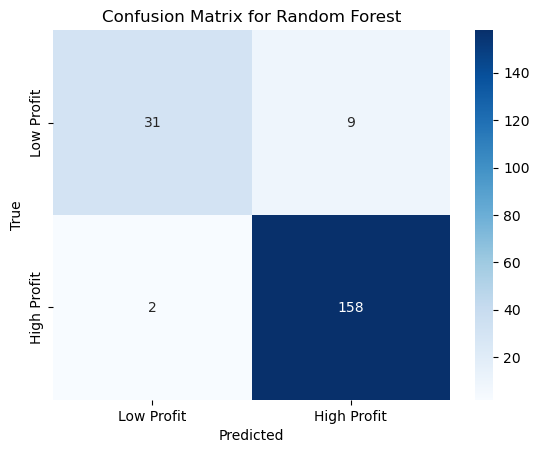

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample

# Initialize Random Forest model with class_weight='balanced' to handle class imbalance
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Random Forest Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Profit', 'High Profit'], yticklabels=['Low Profit', 'High Profit'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



### ROC-Curve

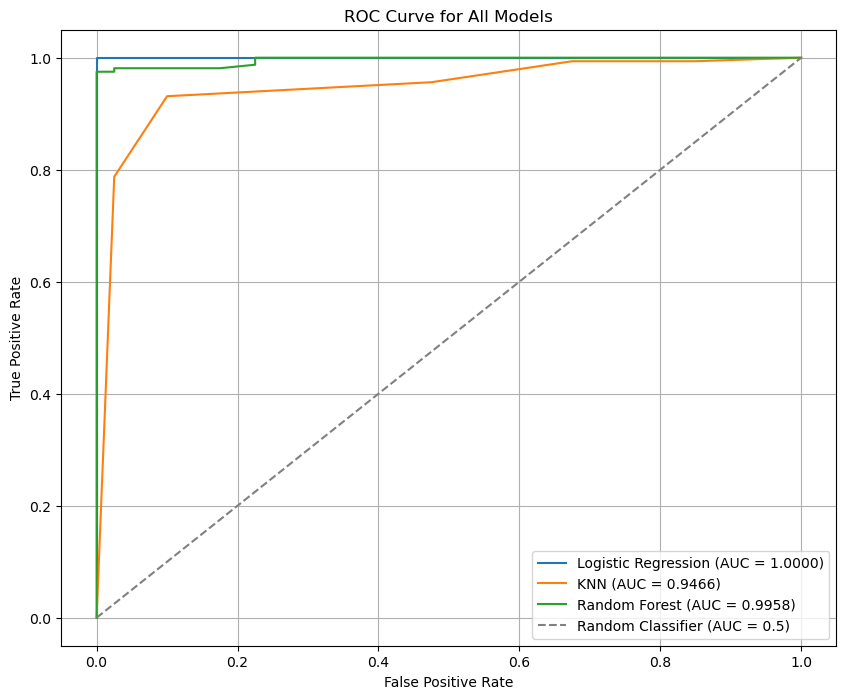

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    # Loop through each model 
    for model_name, model in models.items():
        # Get the predicted probabilities
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
        
        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        
        # Compute AUC (Area Under the Curve)
        auc = roc_auc_score(y_test, y_prob)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')
    
    # Plot the diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.5)')
    
    # Labeling the plot
    plt.title('ROC Curve for All Models')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Initialize models (Assuming models have already been trained)
models = {
    'Logistic Regression': logreg_model,
    'KNN': knn_model,
    'Random Forest': rf_model
}

# Plot ROC curve for all models
plot_roc_curve(models, X_test_scaled, y_test)


#### Use bootstrapping to create confidence intervals around the performance metrics (e.g., accuracy) to understand their stability.

In [24]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np

# Bootstrapping to calculate confidence intervals for accuracy
def bootstrap_metrics(model, X_train, X_test, y_train, y_test, n_iterations=1000):
    accuracies = []
    
    for i in range(n_iterations):
        # Bootstrap resampling
        X_resample, y_resample = resample(X_train, y_train, random_state=42)
        
        # Train the model on the bootstrapped sample
        model.fit(X_resample, y_resample)
        
        # Predict and calculate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        # Log progress every 100 iterations
        if (i + 1) % 100 == 0:
            print(f"Iteration {i + 1}/{n_iterations} completed")
    
    # Calculate the 95% confidence interval for accuracy
    lower = np.percentile(accuracies, 2.5)
    upper = np.percentile(accuracies, 97.5)
    
    return lower, upper

# Calculate bootstrap confidence intervals for Random Forest model
lower, upper = bootstrap_metrics(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, n_iterations=1000)
print("\nBootstrap Confidence Interval for Random Forest Accuracy:")
print(f"95% Confidence Interval: ({lower:.4f}, {upper:.4f})")



# Calculate bootstrap confidence intervals for Logistic Regression
lower, upper = bootstrap_metrics(logreg_model, X_train_scaled, X_test_scaled, y_train, y_test)
print("\nBootstrap Confidence Interval for Logistic Regression Accuracy:")
print(f"95% Confidence Interval: ({lower:.4f}, {upper:.4f})")


# Bootstrapping to calculate confidence intervals for accuracy
lower, upper = bootstrap_metrics(knn_model, X_train_scaled, X_test_scaled, y_train, y_test)
print("\nBootstrap Confidence Interval for KNN Accuracy:")
print(f"95% Confidence Interval: ({lower:.4f}, {upper:.4f})")



Iteration 100/1000 completed
Iteration 200/1000 completed
Iteration 300/1000 completed
Iteration 400/1000 completed
Iteration 500/1000 completed
Iteration 600/1000 completed
Iteration 700/1000 completed
Iteration 800/1000 completed
Iteration 900/1000 completed
Iteration 1000/1000 completed

Bootstrap Confidence Interval for Random Forest Accuracy:
95% Confidence Interval: (0.9500, 0.9500)
Iteration 100/1000 completed
Iteration 200/1000 completed
Iteration 300/1000 completed
Iteration 400/1000 completed
Iteration 500/1000 completed
Iteration 600/1000 completed
Iteration 700/1000 completed
Iteration 800/1000 completed
Iteration 900/1000 completed
Iteration 1000/1000 completed

Bootstrap Confidence Interval for Logistic Regression Accuracy:
95% Confidence Interval: (0.9900, 0.9900)
Iteration 100/1000 completed
Iteration 200/1000 completed
Iteration 300/1000 completed
Iteration 400/1000 completed
Iteration 500/1000 completed
Iteration 600/1000 completed
Iteration 700/1000 completed
Iterati